In [294]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [211]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

ModuleNotFoundError: No module named 'tweepy'

In [212]:
# This piece of code is copied from udacity
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'OAuthHandler' is not defined

## Gather

### 1) Image predictions file

In [213]:
# downloading the file programatically
folder_name = 'Project5_Wrangle&Analyze Data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [214]:
with open (os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
# confirming the file is downloaded and saved to the folder
os.listdir(folder_name)

['image-predictions.tsv']

In [215]:
image_predic = pd.read_csv('image-predictions.tsv', sep="\t")
image_predic.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 2) Twitter archive file

In [216]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 3) Twitter API json file

In [217]:
# reading the tweet_json.txt file line by line and extracting tweet ids, retweets and favorites counts 
df_list = []
with open ('tweet_json.txt') as file:
    for l in file:
        l = file.readline()
        dic = json.loads(l)  # convert dictionary string to dictionary 
        tweet_id = dic['id']
        retweet_count = dic['retweet_count']
        favorite_count = dic['favorite_count']
        df_list.append(
            {
                'tweet_id' : tweet_id,
                'retweet_count': retweet_count,
                'favorite_count': favorite_count
            }
        )

df_json = pd.DataFrame(df_list) #convert dictionary to pandas DataFrame 
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467


## Assess

### Visual Assesment

In [218]:
image_predic

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [219]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [220]:
df_json

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467
...,...,...,...
1172,666057090499244032,146,304
1173,666051853826850816,879,1253
1174,666049248165822465,41,111
1175,666033412701032449,47,128


### Programmatic Assesment
The following methods will be used to assess the data programmatically:
.head 
.tail 
.sample 
.info 
.describe 
.value_counts

In [221]:
image_predic.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1104,722613351520608256,https://pbs.twimg.com/media/Cgc9AjMVIAERdUA.jpg,1,Labrador_retriever,0.530915,True,golden_retriever,0.288230,True,chow,0.044854,True
896,699691744225525762,https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg,1,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False
1362,761292947749015552,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
798,691096613310316544,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,borzoi,0.441269,True,llama,0.278270,False,Arabian_camel,0.063503,False
398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True
1938,860524505164394496,https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg,1,Bedlington_terrier,0.286558,True,toy_poodle,0.235193,True,Lakeland_terrier,0.087951,True
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
606,679877062409191424,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False


In [222]:
image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [223]:
image_predic.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [224]:
sum(image_predic.duplicated())

0

In [225]:
image_predic.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
teapot                  1
shield                  1
mortarboard             1
zebra                   1
beach_wagon             1
Name: p1, Length: 378, dtype: int64

In [226]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
677,789280767834746880,NaN,NaN,2016-10-21 01:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Meyer. He has to hold s...,7.507196e+17,4.196984e+09,2016-07-06 15:54:42 +0000,https://twitter.com/dog_rates/status/750719632...,12,10,Meyer,None,None,None,None
777,776088319444877312,NaN,NaN,2016-09-14 16:00:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't tap the screen to make the hearts appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776088319...,10,10,None,None,None,None,None
1642,684097758874210310,NaN,NaN,2016-01-04 19:43:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lupe. This is how she sleeps. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684097758...,10,10,Lupe,None,None,None,None
594,798705661114773508,NaN,NaN,2016-11-16 01:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Baloo. He's expecting a fa...,7.406770e+17,4.196984e+09,2016-06-08 22:48:46 +0000,https://twitter.com/dog_rates/status/740676976...,11,10,Baloo,None,None,pupper,None
1899,674670581682434048,NaN,NaN,2015-12-09 19:22:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jeb &amp; Bush. Jeb is somehow stuck in t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674670581...,9,10,Jeb,None,None,None,None
227,848324959059550208,NaN,NaN,2017-04-02 00:03:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Odin. He's supposed to be giving directio...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848324959...,12,10,Odin,None,None,None,None
1522,690649993829576704,NaN,NaN,2016-01-22 21:39:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,None,None,None,None
2067,671141549288370177,NaN,NaN,2015-11-30 01:39:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Neat pup here. Enjoys lettuce. Long af ears. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671141549...,9,10,None,None,None,None,None
1514,691090071332753408,NaN,NaN,2016-01-24 02:48:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's a dog in a mailbox. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691090071...,12,10,None,None,None,None,None
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None


In [227]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [228]:
sum(twitter_archive.in_reply_to_status_id.isnull())

2278

In [229]:
sum(twitter_archive.in_reply_to_user_id.isnull())

2278

In [230]:
sum(twitter_archive.retweeted_status_id.isnull())

2175

In [231]:
sum(twitter_archive.retweeted_status_user_id.isnull())

2175

In [232]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [233]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [234]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Darby        1
BeBe         1
Lambeau      1
Karll        1
Tilly        1
Name: name, Length: 957, dtype: int64

In [235]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [236]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [237]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [238]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [239]:
sum(twitter_archive.duplicated())

0

In [240]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [241]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,1.177000e+03,1177.000000,1177.000000
mean,7.426493e+17,3107.338997,7901.181818
std,6.851760e+16,5458.476288,11536.383916
min,6.660209e+17,2.000000,0.000000
25%,6.783968e+17,613.000000,1339.000000
50%,7.193678e+17,1460.000000,3553.000000
75%,7.992971e+17,3628.000000,9872.000000
max,8.921774e+17,79515.000000,131075.000000


In [242]:
sum(df_json.duplicated())

0

### Quality issues
##### `image_predic` table
- dog breeds in p1, p2, and p3 columns somtimes start with capital letter other times with small letter.
- 'Old_English_sheepdog' and 'American_Staffordshire_terrier' the seconde word is capitalized (p1 & p3 column).
- the words in 'Shih-Tzu', 'black-and-tan_coonhound', and 'wire-haired_fox_terrier' are seperated by - instead of _ (p1, p2, and p3 columns).

##### `twitter_archive` table
- dog names has 745 entries of "None" and 55 "a"
- only 394 out of 2356 records with identified dog stages. The missing values are represented as None.
- the timestamp values are strings instead of datetime
- 2175 null values in these columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp). 
- 2278 missing values in the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns.
- the 'rating_denominator' column is not always set to 10.

### Tidiness issues
##### `twitter_archive` table
- dog stages : doggo, floofer, pupper, puppo are used as column names (one variable in four coulmns)
- 'df_json' table and 'image_predic' table can be merged with the twitter archive table

## Clean

In [243]:
# make a copy of each dataframe before cleaning
image_predic_clean = image_predic.copy()
twitter_archive_master = twitter_archive.copy()
df_json_clean = df_json.copy()

#### Define
- `image_predic` table: convert the first letter of each word to lower case in the coulmns p1, p2, and p3 using the .str.lower() method.

#### Code

In [244]:
image_predic_clean['p1'] = image_predic_clean['p1'].str.lower()
image_predic_clean['p2'] = image_predic_clean['p2'].str.lower()
image_predic_clean['p3'] = image_predic_clean['p3'].str.lower()

#### Test

In [245]:
image_predic_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define

- `image_predic` table: replace '-' with '_' in p1, p2, and p3 columns using the .str.replace() method

#### Code

In [246]:
image_predic_clean['p1'] = image_predic_clean['p1'].str.replace('-', '_')
image_predic_clean['p2'] = image_predic_clean['p2'].str.replace('-', '_')
image_predic_clean['p3'] = image_predic_clean['p3'].str.replace('-', '_')

#### Test

In [247]:
image_predic_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1802,832032802820481025,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,whippet,0.601712,True,ibizan_hound,0.152662,True,italian_greyhound,0.135055,True
1566,793962221541933056,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,labrador_retriever,0.861651,True,golden_retriever,0.044462,True,staffordshire_bullterrier,0.016497,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,maltese_dog,0.579472,True,toy_poodle,0.133446,True,shih_tzu,0.094397,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,irish_terrier,0.035306,True
1580,796387464403357696,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1,pekinese,0.461164,True,pomeranian,0.288650,True,siamese_cat,0.052423,False
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,saint_bernard,0.995143,True,cardigan,0.003044,True,english_springer,0.001050,True
474,675147105808306176,https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg,1,golden_retriever,0.949215,True,labrador_retriever,0.016765,True,flat_coated_retriever,0.010637,True
1949,863062471531167744,https://pbs.twimg.com/media/C_o2vKCUwAAgtOp.jpg,2,french_bulldog,0.935804,True,pug,0.059576,True,boxer,0.001412,True
2017,880095782870896641,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,1,miniature_pinscher,0.120298,True,rhodesian_ridgeback,0.106395,True,beagle,0.106073,True


In [248]:
image_predic_clean.p1.value_counts()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
polecat                 1
ice_lolly               1
shopping_basket         1
alp                     1
dining_table            1
Name: p1, Length: 378, dtype: int64

#### Define
- `twitter_archive` table: convert timestamp values to datetime instead of strings using the pd.to_datetime() method.  

#### Code

In [249]:
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

#### Test

In [250]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
- `twitter_archive` table: drop these columns since they have so many missing values and in this projects we are only interested in the tweets not retweets. (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp). 

#### Code

In [251]:
twitter_archive_master = twitter_archive_master.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis= 1)

#### Test

In [252]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define
- `twitter_archive` table: drop the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns since they have 2278 missing values and not nessesary in our analysis. 

#### Code

In [253]:
twitter_archive_master = twitter_archive_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis= 1)

#### Test

In [254]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define
- `twitter_archive` table: add new column 'stage' and drop doggo, floofer, pupper, puppo columns.

#### Code

In [255]:
twitter_archive_master['stage'] = twitter_archive_master[['doggo', 'floofer', 'pupper', 'puppo']].max(1)
# drop doggo, floofer, pupper, puppo columns
twitter_archive_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [256]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   stage               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 165.8+ KB


In [257]:
twitter_archive_master.stage.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: stage, dtype: int64

#### Define
- `twitter_archive` table: convert the 'None' strings to null values in the column 'stage'

#### Code

In [258]:
twitter_archive_master['stage'].replace(to_replace= 'None', value= np.nan, inplace=True)

#### Test

In [259]:
twitter_archive_master.stage.value_counts()

pupper     257
doggo       83
puppo       30
floofer     10
Name: stage, dtype: int64

#### Define
- `twitter_archive` table: set all the values of the 'rating_denominator' to 10 using the .assign() method. 

#### Code

In [260]:
twitter_archive_master = twitter_archive_master.assign(rating_denominator= 10)

#### Test

In [261]:
twitter_archive_master.rating_denominator.unique()

array([10])

#### Define
- `twitter_archive` table: convert the "None" and "a" to null in the dog names column. 

#### Code

In [262]:
twitter_archive_master['name'].replace(to_replace= 'None', value= np.nan, inplace=True)
twitter_archive_master['name'].replace(to_replace= 'a', value= np.nan, inplace=True)

#### Test

In [263]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                1556 non-null   object             
 8   stage               380 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 165.8+ KB


In [264]:
twitter_archive_master.name.value_counts()

Charlie    12
Lucy       11
Oliver     11
Cooper     11
Tucker     10
           ..
Brooks      1
Kawhi       1
Kayla       1
Lilah       1
Tilly       1
Name: name, Length: 955, dtype: int64

#### Define
merge `df_json` table and `image_predic` table with the `twitter_archive_master` table.

#### Code

In [265]:
twitter_archive_master_merge = pd.merge(twitter_archive_master, df_json_clean, on='tweet_id')
twitter_archive_master_merge = pd.merge(twitter_archive_master_merge, image_predic_clean, on='tweet_id')

#### Test

In [266]:
twitter_archive_master_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1031 non-null   int64              
 1   timestamp           1031 non-null   datetime64[ns, UTC]
 2   source              1031 non-null   object             
 3   text                1031 non-null   object             
 4   expanded_urls       1031 non-null   object             
 5   rating_numerator    1031 non-null   int64              
 6   rating_denominator  1031 non-null   int64              
 7   name                730 non-null    object             
 8   stage               163 non-null    object             
 9   retweet_count       1031 non-null   int64              
 10  favorite_count      1031 non-null   int64              
 11  jpg_url             1031 non-null   object             
 12  img_num             1031 non-null 

In [268]:
# save to csv
twitter_archive_master_merge.to_csv('twitter_archive_master.csv')

## Analyze 

#### 1) What dog breed got the highest number of retweets?

In [276]:
twitter_archive_master_merge[['retweet_count','p1', 'p1_conf', 'p1_dog']]

,retweet_count,p1,p1_conf,p1_dog
0,6514,chihuahua,0.323581,True
1,8964,paper_towel,0.170278,False
2,3261,chesapeake_bay_retriever,0.425595,True
3,16716,pomeranian,0.566142,True
4,7711,pembroke,0.511319,True
...,...,...,...,...
1026,146,shopping_cart,0.962465,False
1027,879,box_turtle,0.933012,False
1028,41,miniature_pinscher,0.560311,True
1029,47,german_shepherd,0.596461,True


In [282]:
twitter_archive_master_merge[twitter_archive_master_merge['retweet_count'] == twitter_archive_master_merge.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
418,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,79515,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


labrador_retriever got 79515 retweets, which is the highest.  

#### 2) What dog breed got the highest number of favorites?

In [284]:
twitter_archive_master_merge[twitter_archive_master_merge['favorite_count'] == twitter_archive_master_merge.favorite_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
418,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,79515,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [285]:
twitter_archive_master_merge.favorite_count.max()

131075

labrador_retriever got the highest favorite count with a total of 131075

#### 3) What is the most tweeted dog breed?

In [289]:
dog_breeds = twitter_archive_master_merge[twitter_archive_master_merge.p1_dog == True]
dog_breeds.p1.value_counts()

golden_retriever       75
labrador_retriever     54
chihuahua              46
pembroke               43
pug                    25
                       ..
irish_water_spaniel     1
komondor                1
sussex_spaniel          1
australian_terrier      1
keeshond                1
Name: p1, Length: 104, dtype: int64

golden_retriever is the most tweeted dog breed with a total of 75 tweets. 

#### 4) What is the most frequent dog stage?

In [299]:
twitter_archive_master_merge.stage.value_counts()

pupper     115
doggo       34
puppo        9
floofer      5
Name: stage, dtype: int64

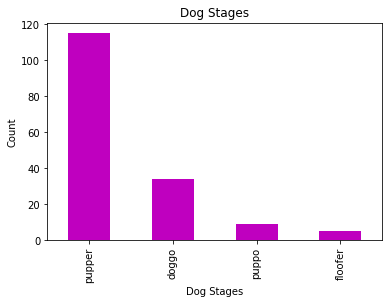

In [308]:
twitter_archive_master_merge.stage.value_counts().plot(kind= 'bar', color='m')
plt.title('Dog Stages')
plt.xlabel('Dog Stages')
plt.ylabel('Count');

As shown in the bar chart above, the pupper dog stage is by far the most frequent one. 

#### Refrences

https://www.w3schools.com/python/python_json.asp

https://www.geeksforgeeks.org/python-convert-string-dictionary-to-dictionary/

https://stackoverflow.com/questions/28056171/how-to-build-and-fill-pandas-dataframe-from-for-loop/28058264#28058264

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

https://stackoverflow.com/questions/22245171/how-to-lowercase-a-pandas-dataframe-string-column-if-it-has-missing-values

https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

https://stackoverflow.com/questions/23743460/replace-none-with-nan-in-pandas-dataframe

https://stackoverflow.com/questions/44723183/set-value-to-an-entire-column-of-a-pandas-dataframe